In [1]:
#install opencv-python
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
# dnn detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

# or we can use  dnn and then read from tensorflow
#cv2.dnn.readNetFromTensorflow

In [5]:
# creating empty list
classLabels = []

file_name = 'labels.txt'

with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
  #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) #as mobilenet takes [-1,1]
model.setInputSwapRB

<function DetectionModel.setInputSwapRB>

In [9]:
img = cv2.imread('testing image.jpg')

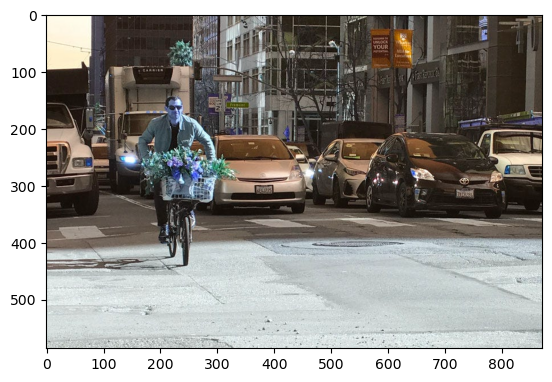

In [10]:
plt.imshow(img)  #bgr

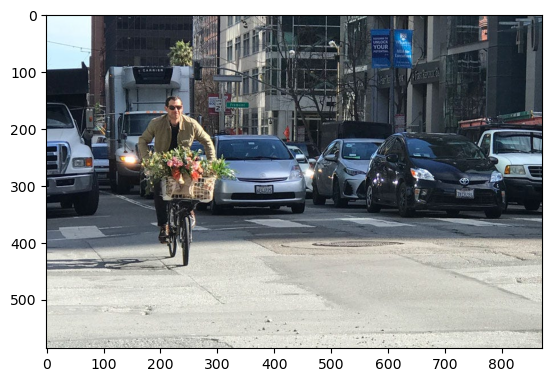

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[ 1  3  3  3 64  2  3  3  3  3  8  3 10  1 10  3]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)

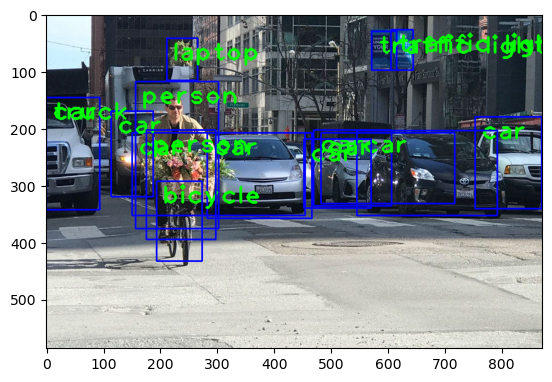

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
#from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images
#import cv2

cap = cv2.VideoCapture("road_trafifc.mp4")

#check if the video is opened correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret,frame = cap.read()
  ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

  print(ClassIndex)
  if(len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
      if (ClassInd<=80):
        cv2.rectangle(frame,boxes,(255,0,0),2)
        cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)

  cv2.imshow('Object Detection Tutorial',frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

[ 1  3  1  1  1  3  1  1  1 28]
[ 1  3  1  1  1  1  1 28  1  3  3]
[ 1  3  1  1  1  1  1  1 28]
[ 1  3  1  3  1  1  3  1 28]
[1 3 1 1 1 3 3 1 1 1]
[1 3 1 1 3 1 1 1 1 1]
[1 1 3 1 3 1 1 1 1]
[ 1  1  3  3  1  1  1  1  1  1 31]
[ 1  1  3  3  1  1  1  1 31  1  1]
[ 1  1  3  1  3  1 31  1  1  1  1  1]
[1 1 1 3 1 3 1 1 1 1]
[1 1 1 1 3 1 3 1 1 1]
[1 1 1 3 1 3 1 1 1 1]
[1 1 1 3 1 3 1 1 1 1]
[1 1 1 1 3 1 1 3 1]
[1 1 1 1 3 1 3 1 1 1]
[1 1 1 3 3 1 1 1 1 1]
[1 1 1 3 3 1 1 1 1]
[1 1 1 3 3 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[ 1  1  1  1  1  1 28]
[1 1 1 1 1 1]
[ 1  1  1  1  1 28  1  1  1  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 4 1 1]
[ 1  1  1  1  1  1 28  1]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 3]
[1 1 1 1 1 3]
[ 1  1  1  1  1 28  1]
[ 1  1  1  1  1  1 28 28]
[ 1  1  1  1 28  1 28  1 28]
[ 1  1  1  1  1 28 28  3 28]
[ 1  1 28  1  1 28  1  1 28]
[28  1  1  1  1 28 28  1  1  3]
[ 1  1 28  1  1  1  3]
[ 1  1 28  1  1  1  4 28  3  1]
[ 1 28  1  1  3  1  1  1  1]
[1 1 3 4 4 1 1 1]
[1 4 4 1 3 1 1 1

In [25]:
#from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images
#import cv2

cap = cv2.VideoCapture(0)

#check if the video is opened correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
  ret,frame = cap.read()
  ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

  print(ClassIndex)
  if(len(ClassIndex)!=0):
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
      if (ClassInd<=80):
        cv2.rectangle(frame,boxes,(255,0,0),2)
        cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)

  cv2.imshow('Object Detection Tutorial',frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[88  1  1]
[ 1  1 88]
[ 1  1 88]
[1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[ 1  1 88  1  1]
[ 1  1  1 88  1]
[ 1  1 88  1]
[ 1  1  1 88  1]
[1 1 1 1]
[1 1 1]
[ 1  1  1  1 88]
[ 1  1  1 88  1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
